### Geometric transformations.

#### Image resizing:

shape ==>  (385, 610, 3)


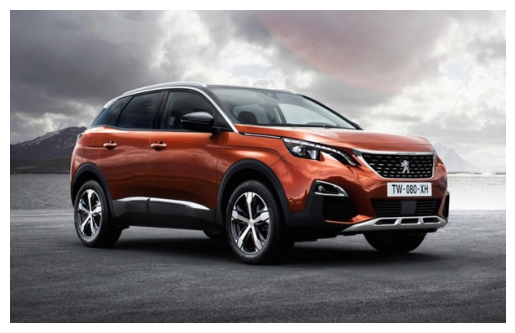

In [74]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


def displayImage(image, color_option=None, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, color_option)


image_path = '../03.jpg'

bgr_image = cv2.imread(image_path, 1)

source_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

source_shape = source_image.shape

print('shape ==> ', source_shape)

displayImage(source_image)

Image resizing with percent size parameter.

shape ==>  (192, 427, 3)


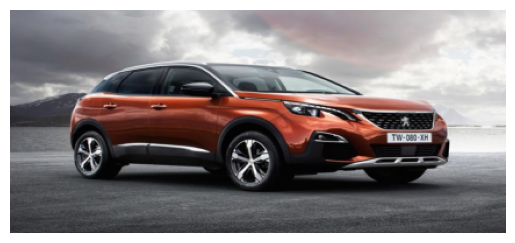

In [75]:
width_percent = 70
height_percent = 50

percent_height = int(source_shape[0] * (height_percent / 100))
percent_width = int(source_shape[1] * (width_percent / 100))

dim = (percent_width, percent_height)

resized_with_percent = cv2.resize(source_image.copy(), dim, interpolation = cv2.INTER_AREA)

print('shape ==> ', resized_with_percent.shape)

displayImage(resized_with_percent)

Image resizing with manual diention settings.

shape ==>  (200, 190, 3)


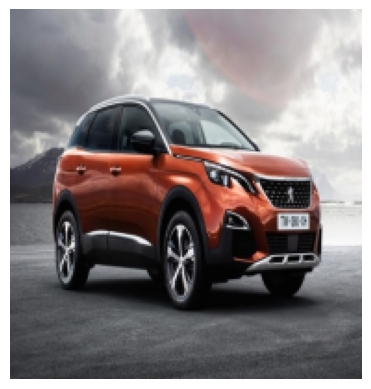

In [76]:
manual_width = 190
manual_height = 200

manual_dim = (manual_width, manual_height)

manual_resized_image = cv2.resize(source_image.copy(), manual_dim, interpolation = cv2.INTER_AREA)

print('shape ==> ', manual_resized_image.shape)

displayImage(manual_resized_image)

Image resizing with scale factor.

shape ==>  (1810, 1464, 3)


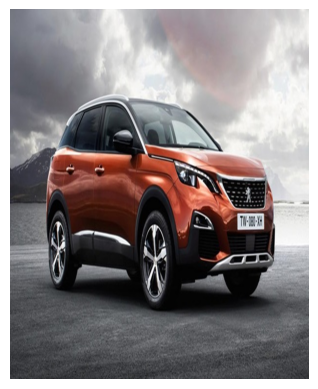

In [77]:
scale_factor_resized_image = cv2.resize(source_image.copy(), dsize=None, fx=2.4, fy=4.7, interpolation=cv2.INTER_CUBIC)

print('shape ==> ', scale_factor_resized_image.shape)

displayImage(scale_factor_resized_image)

#### Shift. Displacement of the object's location.

Shifting matrix M in (x, y) area:

    M = 1 0 tx
        0 1 ty
    
    (tx, ty) - shifting vector (an image will be shifted in this way).


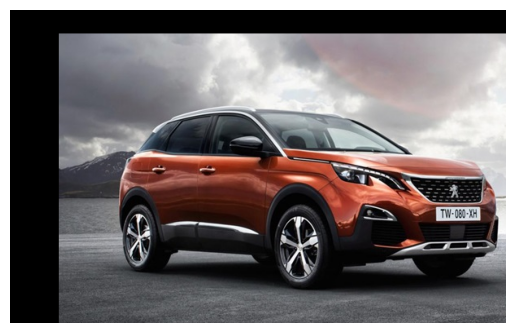

In [78]:
width_shift = 60
height_shift = 30

height, width = source_shape[:2]

M = np.float32([[1, 0, 60], [0, 1, 30]])

shifted_image = cv2.warpAffine(source_image.copy(), M, (width, height))

displayImage(shifted_image)

#### Image rotating.

The image is rotated by certaing θ angle using a following matrix:

    M = cos(θ) -sin(θ)
        sin(θ)  cos(θ) 

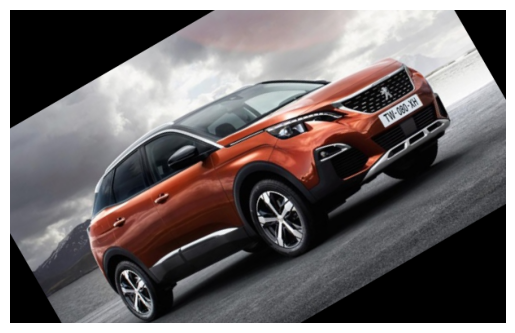

In [79]:
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 30, 1)

rotated_image = cv2.warpAffine(source_image.copy(), rotation_matrix, (width, height))

displayImage(rotated_image)

#### Affine transormation.

All parallel lines in the source image remain parallel in the resulting image.
We need to specify 3 points in the source image that will be shifted to 3 other points in the resulting image. 

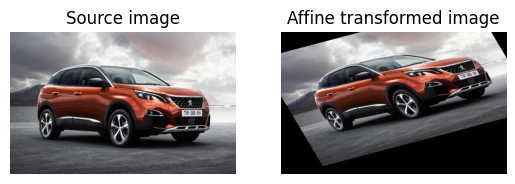

In [80]:
source_points = np.float32([[50, 50], [250, 50], [50, 250]])
output_points = np.float32([[10, 100], [200, 50], [100, 250]])

affine_matrix = cv2.getAffineTransform(source_points, output_points)

output_image = cv2.warpAffine(source_image.copy(), affine_matrix, (width, height))

plt.subplot(121)
displayImage(source_image, title='Source image')

plt.subplot(122)
displayImage(output_image, title='Affine transformed image')

#### Selecting certain area on the image.

Select license plate.

In [81]:
license_plate = cv2.rectangle(source_image.copy(), (463, 212), (518, 229), (0, 255, 0), 2)

Select license plate only and resize image with license plate size.

In [82]:
license_plate_area = source_image[212:229, 463:518]

license_plate_cropped = cv2.resize(license_plate_area, (200, 50), interpolation=cv2.INTER_LINEAR)

Rotated cropped license plate.

In [83]:
license_plate_height, license_plate_width = license_plate_cropped.shape[:2]

center = (license_plate_width / 2, license_plate_height / 2)

license_plate_rotation_matrix = cv2.getRotationMatrix2D(center, 90, 1.5)

rotated_license_plate = cv2.warpAffine(license_plate_cropped, license_plate_rotation_matrix, (250, 140))

Display results.

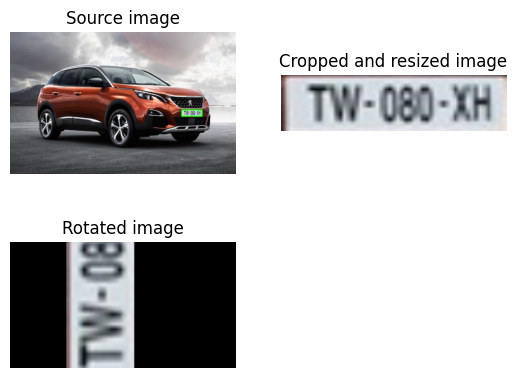

In [84]:
plt.subplot(221)
displayImage(license_plate, title='Source image')

plt.subplot(222)
displayImage(license_plate_cropped, title='Cropped and resized image')

plt.subplot(223)
displayImage(rotated_license_plate, title='Rotated image')